# 📊 StockPulse Data Analysis
### Comprehensive Analysis of NSE Stock Data

This notebook provides detailed analysis of stock data for RELIANCE.NS, TCS.NS, and INFY.NS including:
- Price trend analysis
- Technical indicators
- Volatility analysis
- Correlation analysis
- Risk metrics

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

print("📦 Libraries imported successfully!")

📦 Libraries imported successfully!


In [2]:
# Load processed stock data
stocks = ['RELIANCE_NS', 'TCS_NS', 'INFY_NS']
data = {}

for stock in stocks:
    try:
        file_path = f'../data/processed/{stock}_processed.csv'
        df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
        data[stock] = df
        print(f"✅ Loaded {stock}: {len(df)} records from {df.index.min()} to {df.index.max()}")
    except FileNotFoundError:
        print(f"❌ File not found for {stock}")
    except Exception as e:
        print(f"❌ Error loading {stock}: {str(e)}")

print(f"\n📊 Successfully loaded {len(data)} stocks for analysis")

✅ Loaded RELIANCE_NS: 43 records from 2025-07-22 00:00:00 to 2025-09-19 00:00:00
✅ Loaded TCS_NS: 43 records from 2025-07-22 00:00:00 to 2025-09-19 00:00:00
✅ Loaded INFY_NS: 43 records from 2025-07-22 00:00:00 to 2025-09-19 00:00:00

📊 Successfully loaded 3 stocks for analysis


In [3]:
# Data Overview
print("📈 STOCK DATA OVERVIEW")
print("=" * 50)

for stock_name, df in data.items():
    print(f"\n{stock_name}:")
    print(f"  • Date Range: {df.index.min().strftime('%Y-%m-%d')} to {df.index.max().strftime('%Y-%m-%d')}")
    print(f"  • Records: {len(df)}")
    print(f"  • Current Price: ₹{df['Close'].iloc[-1]:.2f}")
    print(f"  • Price Range: ₹{df['Close'].min():.2f} - ₹{df['Close'].max():.2f}")
    print(f"  • Avg Daily Volume: {df['Volume'].mean():,.0f}")
    
    if 'Daily_Return' in df.columns:
        avg_return = df['Daily_Return'].mean() * 100
        volatility = df['Daily_Return'].std() * 100
        print(f"  • Avg Daily Return: {avg_return:.3f}%")
        print(f"  • Volatility: {volatility:.3f}%")

📈 STOCK DATA OVERVIEW

RELIANCE_NS:
  • Date Range: 2025-07-22 to 2025-09-19
  • Records: 43
  • Current Price: ₹1407.40
  • Price Range: ₹1353.90 - ₹1424.80
  • Avg Daily Volume: 9,836,679
  • Avg Daily Return: 0.005%
  • Volatility: 1.018%

TCS_NS:
  • Date Range: 2025-07-22 to 2025-09-19
  • Records: 43
  • Current Price: ₹3169.20
  • Price Range: ₹3003.00 - ₹3179.10
  • Avg Daily Volume: 2,629,548
  • Avg Daily Return: 0.013%
  • Volatility: 1.092%

INFY_NS:
  • Date Range: 2025-07-22 to 2025-09-19
  • Records: 43
  • Current Price: ₹1540.20
  • Price Range: ₹1423.10 - ₹1574.50
  • Avg Daily Volume: 8,193,675
  • Avg Daily Return: -0.035%
  • Volatility: 1.568%


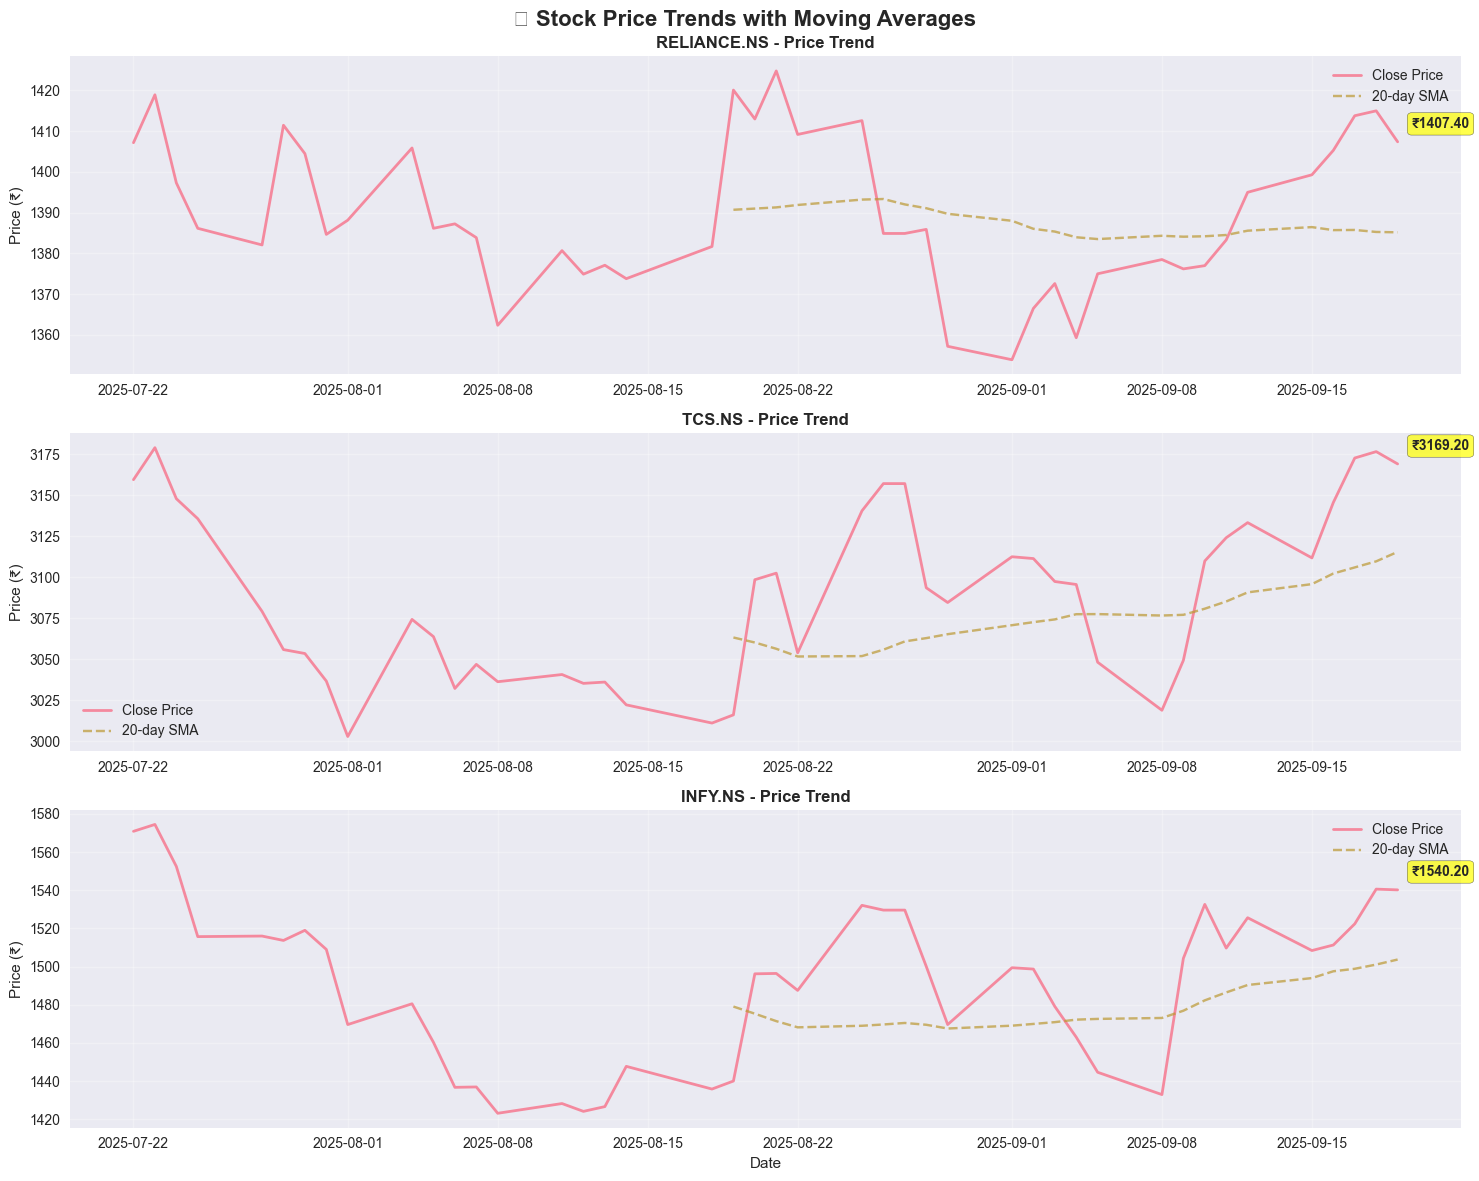

In [4]:
# 1. Price Trend Analysis
fig, axes = plt.subplots(3, 1, figsize=(15, 12))
fig.suptitle('📈 Stock Price Trends with Moving Averages', fontsize=16, fontweight='bold')

for i, (stock_name, df) in enumerate(data.items()):
    ax = axes[i]
    
    # Plot closing price
    ax.plot(df.index, df['Close'], label='Close Price', linewidth=2, alpha=0.8)
    
    # Plot SMA if available
    if 'SMA_20' in df.columns:
        ax.plot(df.index, df['SMA_20'], label='20-day SMA', linestyle='--', alpha=0.7)
    
    ax.set_title(f'{stock_name.replace("_", ".")} - Price Trend', fontweight='bold')
    ax.set_ylabel('Price (₹)')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Add current price annotation
    current_price = df['Close'].iloc[-1]
    ax.annotate(f'₹{current_price:.2f}', 
                xy=(df.index[-1], current_price),
                xytext=(10, 10), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
                fontweight='bold')

axes[-1].set_xlabel('Date')
plt.tight_layout()
plt.show()

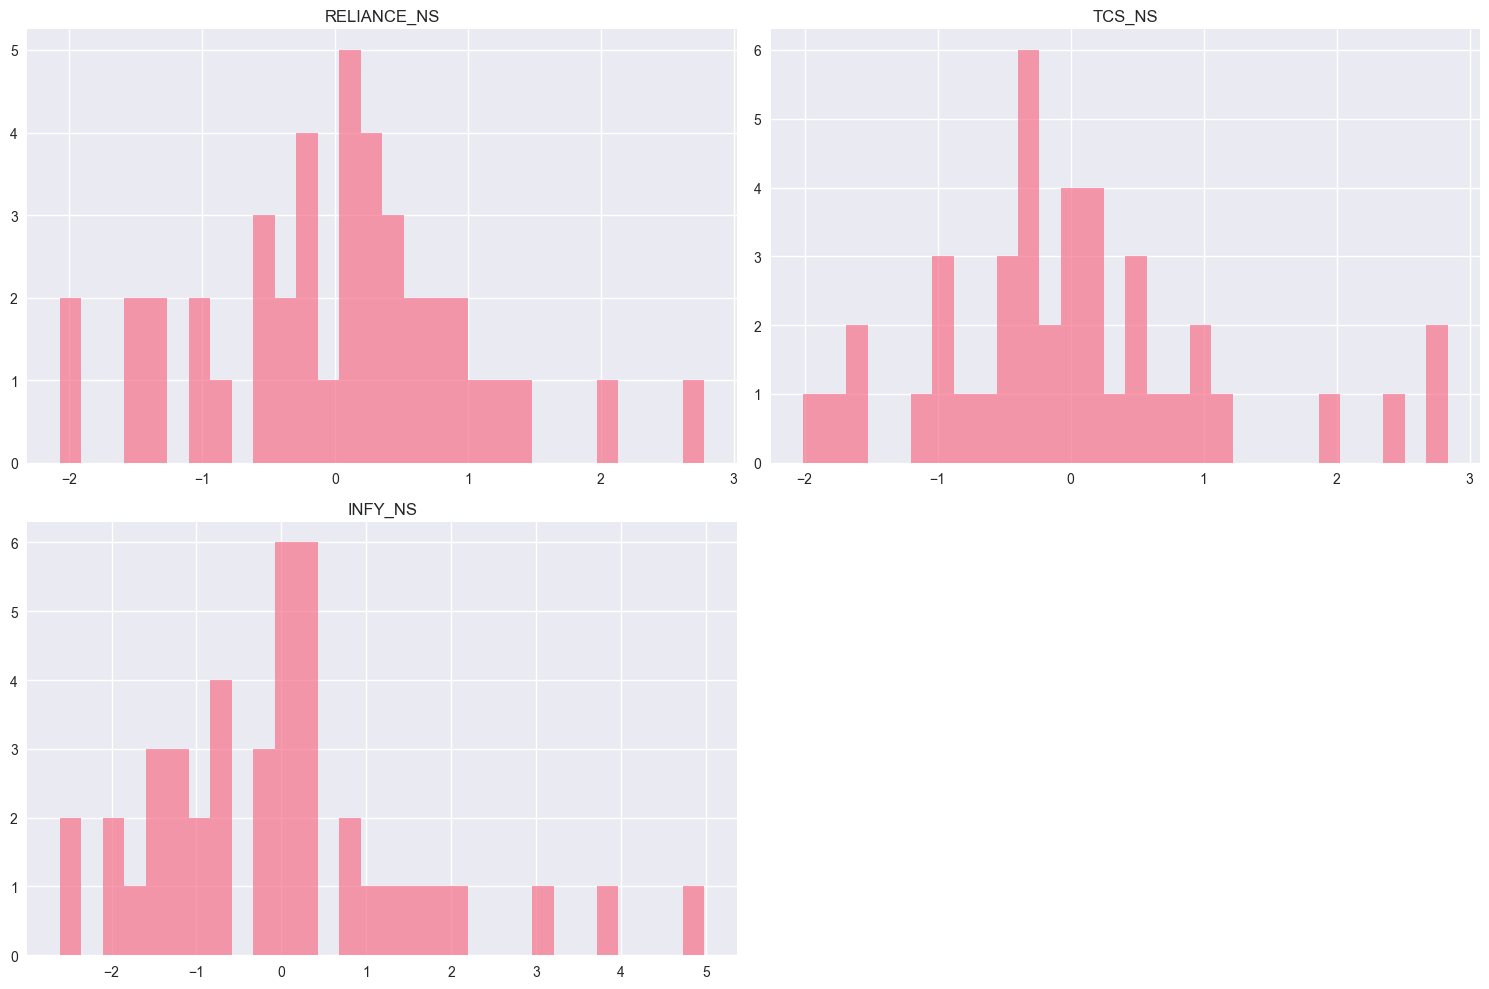

In [5]:
# 2. Daily Returns Analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('📊 Daily Returns Analysis', fontsize=16, fontweight='bold')

# Combine all returns for comparison
returns_data = pd.DataFrame()
for stock_name, df in data.items():
    if 'Daily_Return' in df.columns:
        returns_data[stock_name] = df['Daily_Return'] * 100  # Convert to percentage

# Plot 1: Daily returns over time
ax1 = axes[0, 0]
for stock in returns_data.columns:
    ax1.plot(returns_data.index, returns_data[stock], alpha=0.7, label=stock.replace('_', '.'))
ax1.set_title('Daily Returns Over Time')
ax1.set_ylabel('Daily Return (%)')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='red', linestyle='--', alpha=0.5)

# Plot 2: Returns distribution
ax2 = axes[0, 1]
returns_data.hist(bins=30, alpha=0.7, ax=ax2)
ax2.set_title('Returns Distribution')
ax2.set_xlabel('Daily Return (%)')
ax2.set_ylabel('Frequency')

# Plot 3: Box plot of returns
ax3 = axes[1, 0]
returns_data.boxplot(ax=ax3)
ax3.set_title('Returns Box Plot')
ax3.set_ylabel('Daily Return (%)')
ax3.tick_params(axis='x', rotation=45)

# Plot 4: Cumulative returns
ax4 = axes[1, 1]
cumulative_returns = (1 + returns_data/100).cumprod() - 1
for stock in cumulative_returns.columns:
    ax4.plot(cumulative_returns.index, cumulative_returns[stock] * 100, 
             label=stock.replace('_', '.'), linewidth=2)
ax4.set_title('Cumulative Returns')
ax4.set_ylabel('Cumulative Return (%)')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

⚖️ RISK & RETURN ANALYSIS
                           RELIANCE_NS  TCS_NS  INFY_NS
Avg Daily Return (%)             0.005   0.013   -0.035
Annualized Return (%)            1.366   3.278   -8.848
Volatility (%)                   1.018   1.092    1.568
Annualized Volatility (%)       16.156  17.330   24.890
Sharpe Ratio                     0.085   0.189   -0.355
Max Drawdown (%)                -4.976  -5.539   -9.616
VaR 95% (%)                        NaN     NaN      NaN
Skewness                         0.175   0.784    1.155
Kurtosis                         0.596   1.010    2.045


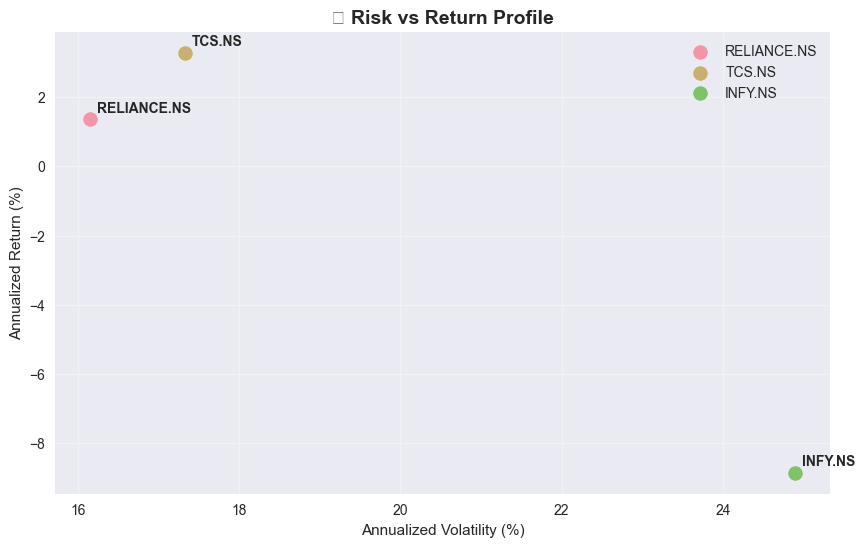

In [6]:
# 3. Risk and Return Metrics
print("⚖️ RISK & RETURN ANALYSIS")
print("=" * 60)

metrics_df = pd.DataFrame()

for stock_name, df in data.items():
    if 'Daily_Return' in df.columns:
        returns = df['Daily_Return']
        
        # Calculate metrics
        metrics = {
            'Avg Daily Return (%)': returns.mean() * 100,
            'Annualized Return (%)': returns.mean() * 252 * 100,
            'Volatility (%)': returns.std() * 100,
            'Annualized Volatility (%)': returns.std() * np.sqrt(252) * 100,
            'Sharpe Ratio': (returns.mean() / returns.std()) * np.sqrt(252) if returns.std() > 0 else 0,
            'Max Drawdown (%)': ((df['Close'] / df['Close'].cummax()) - 1).min() * 100,
            'VaR 95% (%)': np.percentile(returns * 100, 5),
            'Skewness': returns.skew(),
            'Kurtosis': returns.kurtosis()
        }
        
        metrics_df[stock_name] = metrics

# Display metrics table
print(metrics_df.round(3))

# Risk-Return Scatter Plot
plt.figure(figsize=(10, 6))
for stock in metrics_df.columns:
    x = metrics_df.loc['Annualized Volatility (%)', stock]
    y = metrics_df.loc['Annualized Return (%)', stock]
    plt.scatter(x, y, s=100, label=stock.replace('_', '.'), alpha=0.7)
    plt.annotate(stock.replace('_', '.'), (x, y), xytext=(5, 5), 
                textcoords='offset points', fontweight='bold')

plt.xlabel('Annualized Volatility (%)')
plt.ylabel('Annualized Return (%)')
plt.title('📊 Risk vs Return Profile', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

🔄 CORRELATION ANALYSIS
Daily Returns Correlation Matrix:
             RELIANCE_NS  TCS_NS  INFY_NS
RELIANCE_NS        1.000   0.126    0.164
TCS_NS             0.126   1.000    0.707
INFY_NS            0.164   0.707    1.000


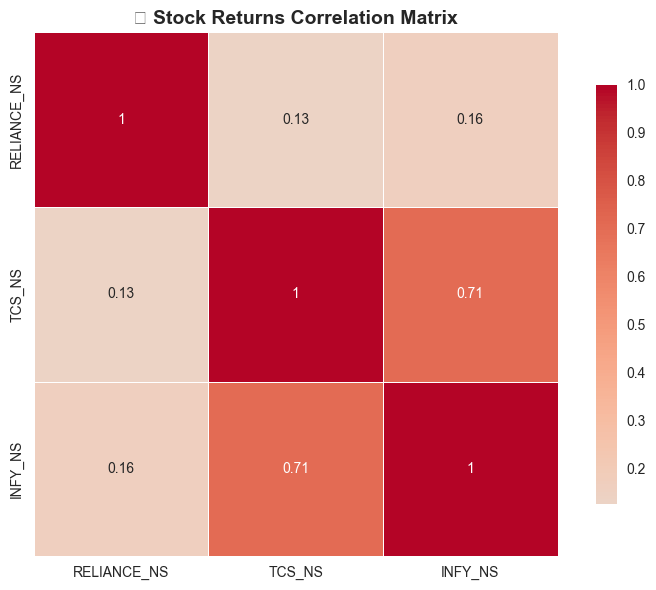


Price Correlation Matrix:
             RELIANCE_NS  TCS_NS  INFY_NS
RELIANCE_NS        1.000   0.341    0.468
TCS_NS             0.341   1.000    0.829
INFY_NS            0.468   0.829    1.000


In [7]:
# 4. Correlation Analysis
print("🔄 CORRELATION ANALYSIS")
print("=" * 40)

# Create correlation matrix for returns
correlation_matrix = returns_data.corr()
print("Daily Returns Correlation Matrix:")
print(correlation_matrix.round(3))

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('📈 Stock Returns Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Price correlation
price_data = pd.DataFrame()
for stock_name, df in data.items():
    price_data[stock_name] = df['Close']

price_correlation = price_data.corr()
print("\nPrice Correlation Matrix:")
print(price_correlation.round(3))

In [8]:
# 5. Technical Analysis Summary
print("🔧 TECHNICAL ANALYSIS SUMMARY")
print("=" * 50)

for stock_name, df in data.items():
    print(f"\n📊 {stock_name.replace('_', '.')}:")
    
    current_price = df['Close'].iloc[-1]
    
    # SMA Analysis
    if 'SMA_20' in df.columns:
        sma_20 = df['SMA_20'].iloc[-1]
        if pd.notna(sma_20):
            sma_signal = "BUY" if current_price > sma_20 else "SELL"
            sma_diff = ((current_price - sma_20) / sma_20) * 100
            print(f"  • Price vs 20-SMA: {sma_diff:+.2f}% → {sma_signal}")
    
    # Support and Resistance
    recent_high = df['High'].rolling(20).max().iloc[-1]
    recent_low = df['Low'].rolling(20).min().iloc[-1]
    print(f"  • 20-day High: ₹{recent_high:.2f}")
    print(f"  • 20-day Low: ₹{recent_low:.2f}")
    print(f"  • Current Position: {((current_price - recent_low) / (recent_high - recent_low) * 100):.1f}% of range")
    
    # Volume Analysis
    avg_volume = df['Volume'].rolling(20).mean().iloc[-1]
    current_volume = df['Volume'].iloc[-1]
    volume_ratio = current_volume / avg_volume if avg_volume > 0 else 0
    print(f"  • Volume vs 20-day avg: {volume_ratio:.2f}x")
    
    # Volatility
    if 'Daily_Return' in df.columns:
        recent_vol = df['Daily_Return'].rolling(20).std().iloc[-1] * 100
        print(f"  • 20-day Volatility: {recent_vol:.2f}%")

🔧 TECHNICAL ANALYSIS SUMMARY

📊 RELIANCE.NS:
  • Price vs 20-SMA: +1.60% → BUY
  • 20-day High: ₹1422.00
  • 20-day Low: ₹1340.60
  • Current Position: 82.1% of range
  • Volume vs 20-day avg: 1.45x
  • 20-day Volatility: 0.84%

📊 TCS.NS:
  • Price vs 20-SMA: +1.72% → BUY
  • 20-day High: ₹3203.00
  • 20-day Low: ₹3016.00
  • Current Position: 81.9% of range
  • Volume vs 20-day avg: 2.00x
  • 20-day Volatility: 1.12%

📊 INFY.NS:
  • Price vs 20-SMA: +2.43% → BUY
  • 20-day High: ₹1555.00
  • 20-day Low: ₹1428.30
  • Current Position: 88.3% of range
  • Volume vs 20-day avg: 1.70x
  • 20-day Volatility: 1.78%


In [9]:
# 6. Export Analysis Results
print("💾 EXPORTING ANALYSIS RESULTS")
print("=" * 40)

# Create analysis summary
analysis_date = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
summary = {
    'analysis_date': analysis_date,
    'stocks_analyzed': list(data.keys()),
    'data_period': f"{min([df.index.min() for df in data.values()])} to {max([df.index.max() for df in data.values()])}",
    'total_records': sum([len(df) for df in data.values()])
}

# Save metrics to CSV
if not metrics_df.empty:
    output_file = f'../data/processed/analysis_metrics_{datetime.now().strftime("%Y%m%d")}.csv'
    metrics_df.T.to_csv(output_file)
    print(f"✅ Metrics exported to: {output_file}")

# Save correlation matrix
if not correlation_matrix.empty:
    corr_file = f'../data/processed/correlation_matrix_{datetime.now().strftime("%Y%m%d")}.csv'
    correlation_matrix.to_csv(corr_file)
    print(f"✅ Correlation matrix exported to: {corr_file}")

print(f"\n📋 Analysis Summary:")
for key, value in summary.items():
    print(f"  • {key}: {value}")

print("\n🎉 Analysis complete! Check the exported files for detailed results.")

💾 EXPORTING ANALYSIS RESULTS
✅ Metrics exported to: ../data/processed/analysis_metrics_20250920.csv
✅ Correlation matrix exported to: ../data/processed/correlation_matrix_20250920.csv

📋 Analysis Summary:
  • analysis_date: 2025-09-20 17:28:26
  • stocks_analyzed: ['RELIANCE_NS', 'TCS_NS', 'INFY_NS']
  • data_period: 2025-07-22 00:00:00 to 2025-09-19 00:00:00
  • total_records: 129

🎉 Analysis complete! Check the exported files for detailed results.
